In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
g = nx.MultiDiGraph()
g.add_nodes_from([i for i in range(1, 4)])

In [3]:
g.add_edge(1, 2, price=20)
g.add_edge(2, 3, price=30)
# g.add_edge(1, 2, price=45)
g.add_edge(2, 1, price=10)

0

{(1, 2): Text(-0.4999999999999998, 0.1267404850885314, '20'),
 (2, 3): Text(0.4176020340634896, -0.10564253660257972, '30'),
 (2, 1): Text(-0.4999999999999998, 0.1267404850885314, '10')}

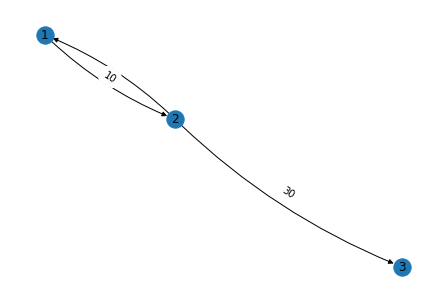

In [21]:
pos = nx.spring_layout(g)
nx.draw(g, pos, with_labels=True, connectionstyle='arc3, rad = 0.1')
edge_labels=dict([((u,v,),d['price'])
             for u,v,d in g.edges(data=True)])
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

# nx.draw_networkx_edge_labels(G,pos,edge_labels={('A','B'):'AB',\
# ('B','C'):'BC',('B','D'):'BD'},font_color='red')

In [41]:
from src.load import name_cleaner
from src.util import TransferNetwork, FinancialTransferNetwork

import pandas as pd
import networkx as nx


def financial_transfer_network_from_df(df: pd.DataFrame, currency='dollars', denomination=1000000) -> FinancialTransferNetwork:
    """
    Create a basic transfer network from a pandas dataframe. Directed
    edges are player from club x to club y.
    Inputs:
        table:  pandas dataframe with columns 'club_name', 'club_involved_name', 'transfer_movement', 'fee_cleaned'
    Outputs:
        FinancialTransferNetwork
    """
    
    # set the key used for indexing into currency
    edge_key = 'fee'
    
    # get all the raw club names
    clubs = set(
        list(df["club_name"].unique()) + list(df["club_involved_name"].unique())
    )

    # create a mapping from the club names in the table to our standardized club names
    table_to_standard = {club: name_cleaner(club) for club in clubs}

    G = nx.MultiDiGraph()
    
    league_clubs = set()
    
    for idx, row in df.iterrows():
        
        # get the standardized names
        club_name = table_to_standard[row["club_name"]]
        club_involved = table_to_standard[row["club_involved_name"]]
        
        # get the price
        amount = row['fee_cleaned']

        if row["transfer_movement"] == "out":
            G.add_edge(club_involved, club_name, fee=amount)
        elif row["transfer_movement"] == "in":
            G.add_edge(club_name, club_involved, fee=amount)

        league_clubs.add(club_name)
        
    return FinancialTransferNetwork(G, league_clubs, currency, denomination, edge_key)

ftn = financial_transfer_network_from_df(pd.read_csv('./data/2020/english_premier_league.csv'))
    

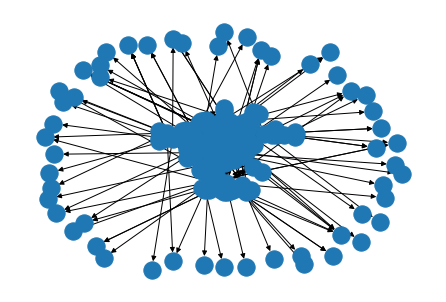

In [43]:
pos = nx.spring_layout(ftn.G)
nx.draw(ftn.G, pos=pos)

In [45]:
from webweb import Web

w = Web(nx_G=ftn.G)
w.show()